**IMPORT THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

**Loading the Data**


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [ ]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

**Data Frame**

In [ ]:
df.shape

(10127, 23)

In [ ]:
df = df.iloc[:,1:-2]

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.ndim

2

In [ ]:
df.size

202540

In [ ]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

**Checking NAN Values**

<Axes: >

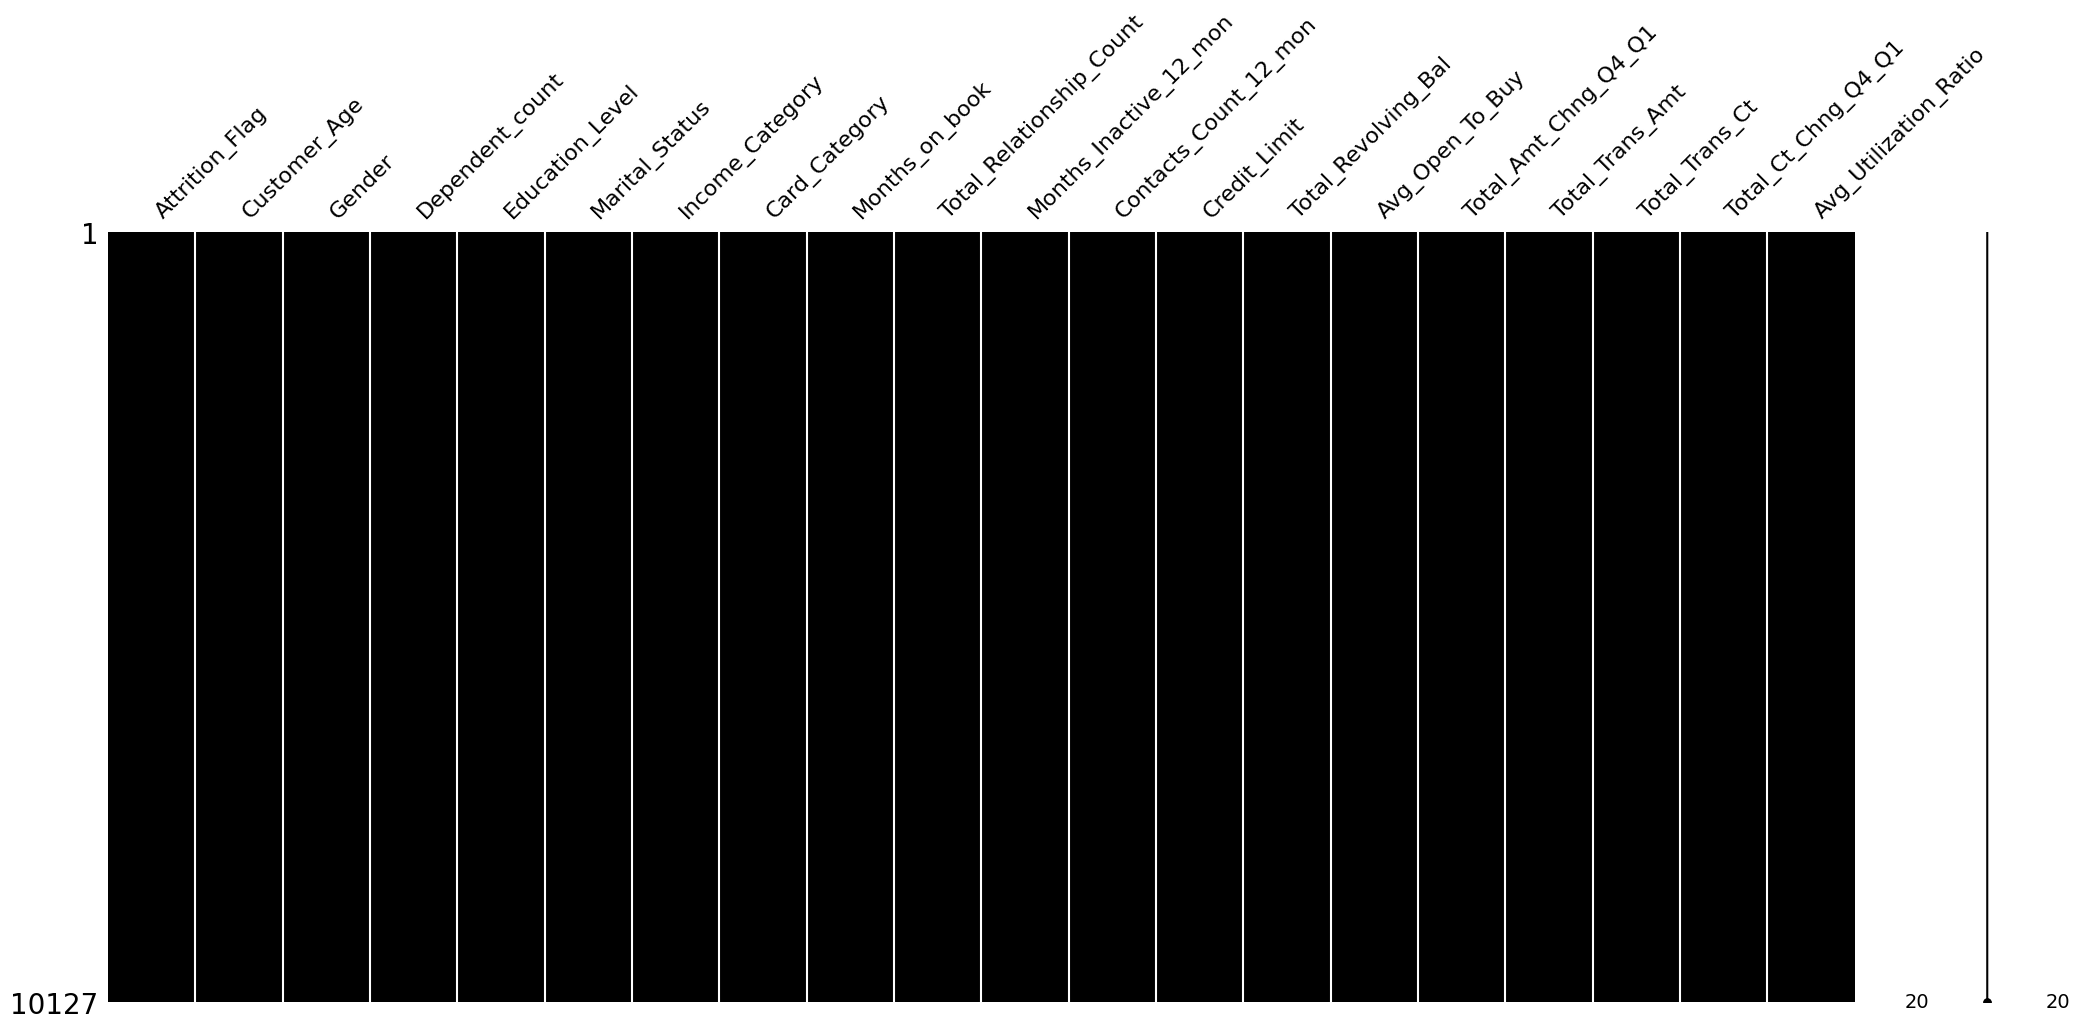

In [ ]:
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [ ]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

Total  Percentage
Attrition_Flag                0         0.0
Customer_Age                  0         0.0
Total_Ct_Chng_Q4_Q1           0         0.0
Total_Trans_Ct                0         0.0
Total_Trans_Amt               0         0.0
Total_Amt_Chng_Q4_Q1          0         0.0
Avg_Open_To_Buy               0         0.0
Total_Revolving_Bal           0         0.0
Credit_Limit                  0         0.0
Contacts_Count_12_mon         0         0.0
Months_Inactive_12_mon        0         0.0
Total_Relationship_Count      0         0.0
Months_on_book                0         0.0
Card_Category                 0         0.0
Income_Category               0         0.0
Marital_Status                0         0.0
Education_Level               0         0.0
Dependent_count               0         0.0
Gender                        0         0.0
Avg_Utilization_Ratio         0         0.0

**Finding the Dupilcate Records**

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

**Basic Statistics**

In [ ]:
round(df.describe(exclude = 'object'), 2)

Customer_Age  Dependent_count  Months_on_book  \
count      10127.00         10127.00        10127.00   
mean          46.33             2.35           35.93   
std            8.02             1.30            7.99   
min           26.00             0.00           13.00   
25%           41.00             1.00           31.00   
50%           46.00             2.00           36.00   
75%           52.00             3.00           40.00   
max           73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24                   0.28  
min                   0.00                   0.00  
25%                   0.58                   0.02  
50%                   0.70                   0.18  
75%                   0.82                   0.50  
max                   3.71                   1.00

In [ ]:
round(df.describe(exclude = ['float', 'int64']),2)

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
df.head().style

In [ ]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [ ]:
df.head().style

**Detecting The Outliers**

In [ ]:
continuous_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Colors = ['#f03a17']
for feature in continuous_feature:
    data=df.copy()
    fig = px.histogram(df, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()
    print("Skewness: %f" % df['Attrition_Flag'].skew())
    print("Kurtosis: %f" % df['Attrition_Flag'].kurt())

Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


**EDA & Visualization On Numerical Analysis**

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
df[numerical_features].head()

Number of numerical variables:  15


Numberical Variables Column:  ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']




Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

**Analysis The Attrition_Flag**

In [ ]:
from IPython.core.display import HTML

def multi_table(table_list):

   return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts())
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(),
                      x = df['Attrition_Flag'].value_counts().index,
                      text=df['Attrition_Flag'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10500])
iplot(fig)

**Analysis The Customer_Age**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts())
              for var in {'Customer_Age'}}
multi_table([ df_nunique['Customer_Age']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(),
                      x = df['Customer_Age'].value_counts().index,
                      text=df['Customer_Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,650])
iplot(fig)

**Problem With Customer_Age**

In [ ]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df['Customer_Age']<=35),'Age']=0
df.loc[(df['Customer_Age']>35)&(df['Customer_Age']<=45),'Age']=1
df.loc[(df['Customer_Age']>45)&(df['Customer_Age']<=55),'Age']=2
df.loc[(df['Customer_Age']>55)&(df['Customer_Age']<=65),'Age']=3
df.loc[df['Customer_Age']>65,'Age']=4
df['Age']=df['Age'].astype(int)

In [ ]:
df.drop(['Customer_Age'],axis = 1,inplace = True)

In [ ]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts())
              for var in {'Age'}}
multi_table([ df_nunique['Age']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(),
                      x = df['Age'].value_counts().index,
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Dependent_count**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts())
              for var in {'Dependent_count'}}
multi_table([ df_nunique['Dependent_count']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(),
                      x = df['Dependent_count'].value_counts().index,
                      text=df['Dependent_count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3200])
iplot(fig)



In [ ]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Months_on_book**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts())
              for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Months_on_book'].value_counts().values.tolist(),
                      x = df['Months_on_book'].value_counts().index,
                      text=df['Months_on_book'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2800])
iplot(fig)

In [ ]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book']<=10),'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book']<=20),'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30),'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40),'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50,'Bank_Relationship_Period']=4

In [ ]:
df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

In [ ]:
df.drop(['Months_on_book'],axis = 1,inplace = True)

In [ ]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts())
              for var in {'Bank_Relationship_Period'}}
multi_table([ df_nunique['Bank_Relationship_Period']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Bank_Relationship_Period'].value_counts().values.tolist(),
                      x = df['Bank_Relationship_Period'].value_counts().index,
                      text=df['Bank_Relationship_Period'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Bank_Relationship_Period", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

***Analysis The Total_Relationship_Count ***

In [ ]:
df_nunique = {var: pd.DataFrame(df['Total_Relationship_Count'].value_counts())
              for var in {'Total_Relationship_Count'}}
multi_table([ df_nunique['Total_Relationship_Count']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Total_Relationship_Count'].value_counts().values.tolist(),
                      x = df['Total_Relationship_Count'].value_counts().index,
                      text=df['Total_Relationship_Count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Relationship_Count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Months_Inactive_12_mon**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Months_Inactive_12_mon'].value_counts())
              for var in {'Months_Inactive_12_mon'}}
multi_table([ df_nunique['Months_Inactive_12_mon']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Months_Inactive_12_mon'].value_counts().values.tolist(),
                      x = df['Months_Inactive_12_mon'].value_counts().index,
                      text=df['Months_Inactive_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Months_Inactive_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Contacts_Count_12_mon**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Contacts_Count_12_mon'].value_counts())
              for var in {'Contacts_Count_12_mon'}}
multi_table([ df_nunique['Contacts_Count_12_mon']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Contacts_Count_12_mon'].value_counts().values.tolist(),
                      x = df['Contacts_Count_12_mon'].value_counts().index,
                      text=df['Contacts_Count_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Credit_Limit**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Credit_Limit']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])

iplot(fig)

In [ ]:
fig = px.histogram(df, x="Credit_Limit")
fig.show()

In [ ]:
fig = px.histogram(df, x="Credit_Limit", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

***Analysis The Total_Revolving_Bal ***

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Revolving_Bal']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Revolving_Bal")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Revolving_Bal", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Avg_Open_To_Buy**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Open_To_Buy']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Avg_Open_To_Buy")
fig.show()

In [ ]:
fig = px.histogram(df, x="Avg_Open_To_Buy", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Total_Amt_Chng_Q4_Q1**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Amt_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

***Analysis The Total_Trans_Amt ***

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Amt']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,20000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Trans_Amt")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Amt", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Total_Trans_Ct**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Ct']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Trans_Ct")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Ct", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Total_Ct_Chng_Q4_Q1**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Ct_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Avg_Utilization_Ratio**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Utilization_Ratio']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Avg_Utilization_Ratio")
fig.show()

In [ ]:
fig = px.histogram(df, x="Avg_Utilization_Ratio", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**EDA & Visualization On Categorical Analysis**

In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print("\n")
print('Categorical variables column name:',cat_features)
print("\n")
# visualise the numerical variables........
df[cat_features].head()

Number of categorical variables:  5


Categorical variables column name: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']




Gender Education_Level Marital_Status Income_Category Card_Category
0      M     High School        Married     $60K - $80K          Blue
1      F        Graduate         Single  Less than $40K          Blue
2      M        Graduate        Married    $80K - $120K          Blue
3      F     High School        Unknown  Less than $40K          Blue
4      M      Uneducated        Married     $60K - $80K          Blue

**Analysis The Gender**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts())
              for var in {'Gender'}}
multi_table([ df_nunique['Gender']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(),
                      x = df['Gender'].value_counts().index,
                      text=df['Gender'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,8000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Education_Level**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts())
              for var in {'Education_Level'}}
multi_table([ df_nunique['Education_Level']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(),
                      x = df['Education_Level'].value_counts().index,
                      text=df['Education_Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Marital_Status**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts())
              for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(),
                      x = df['Marital_Status'].value_counts().index,
                      text=df['Marital_Status'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Income_Category**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts())
              for var in {'Income_Category'}}
multi_table([ df_nunique['Income_Category']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(),
                      x = df['Income_Category'].value_counts().index,
                      text=df['Income_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Analysis The Card_Category**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts())
              for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category']])

In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(),
                      x = df['Card_Category'].value_counts().index,
                      text=df['Card_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**Visualize The Correlation Between Dependent And Independent Dependent Features**

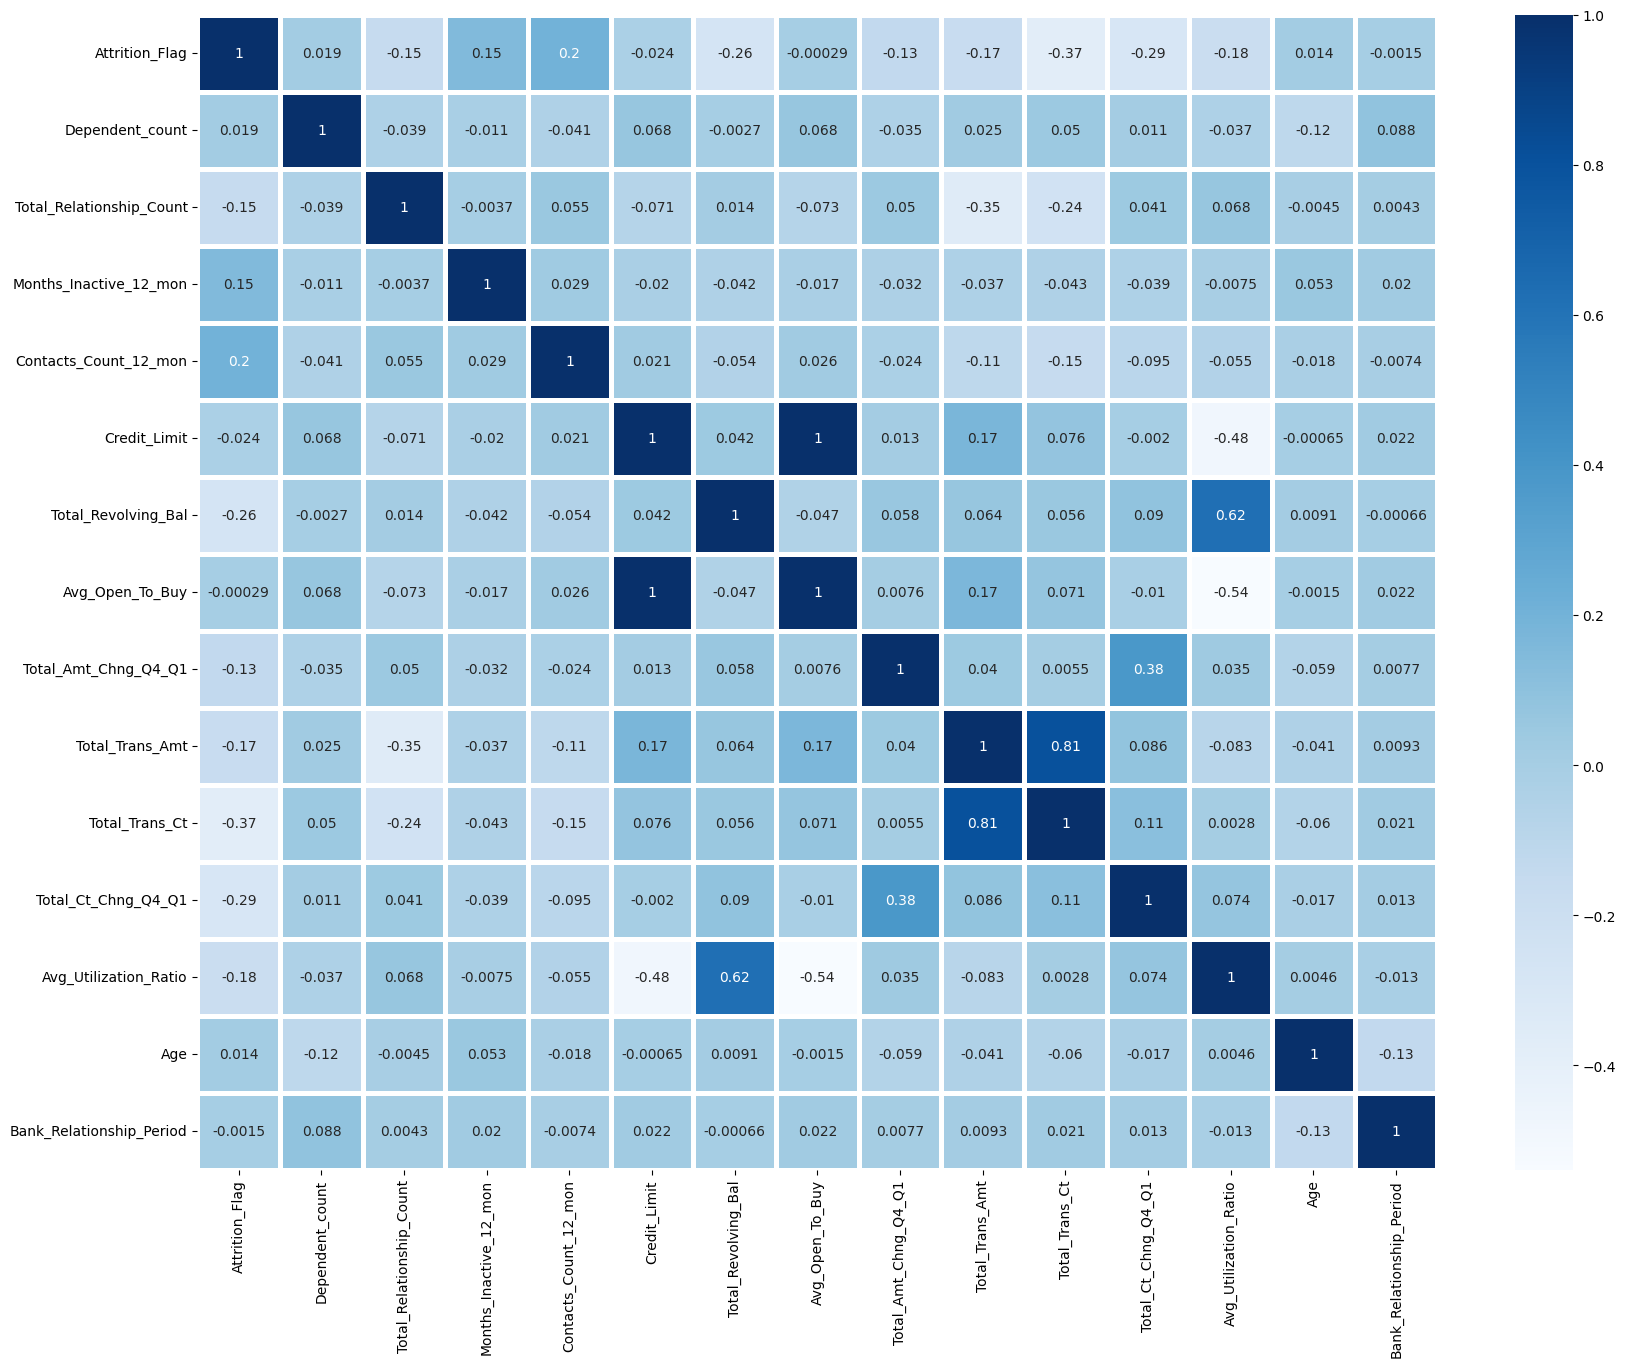

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
corrmat = numerical_df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')
plt.show()

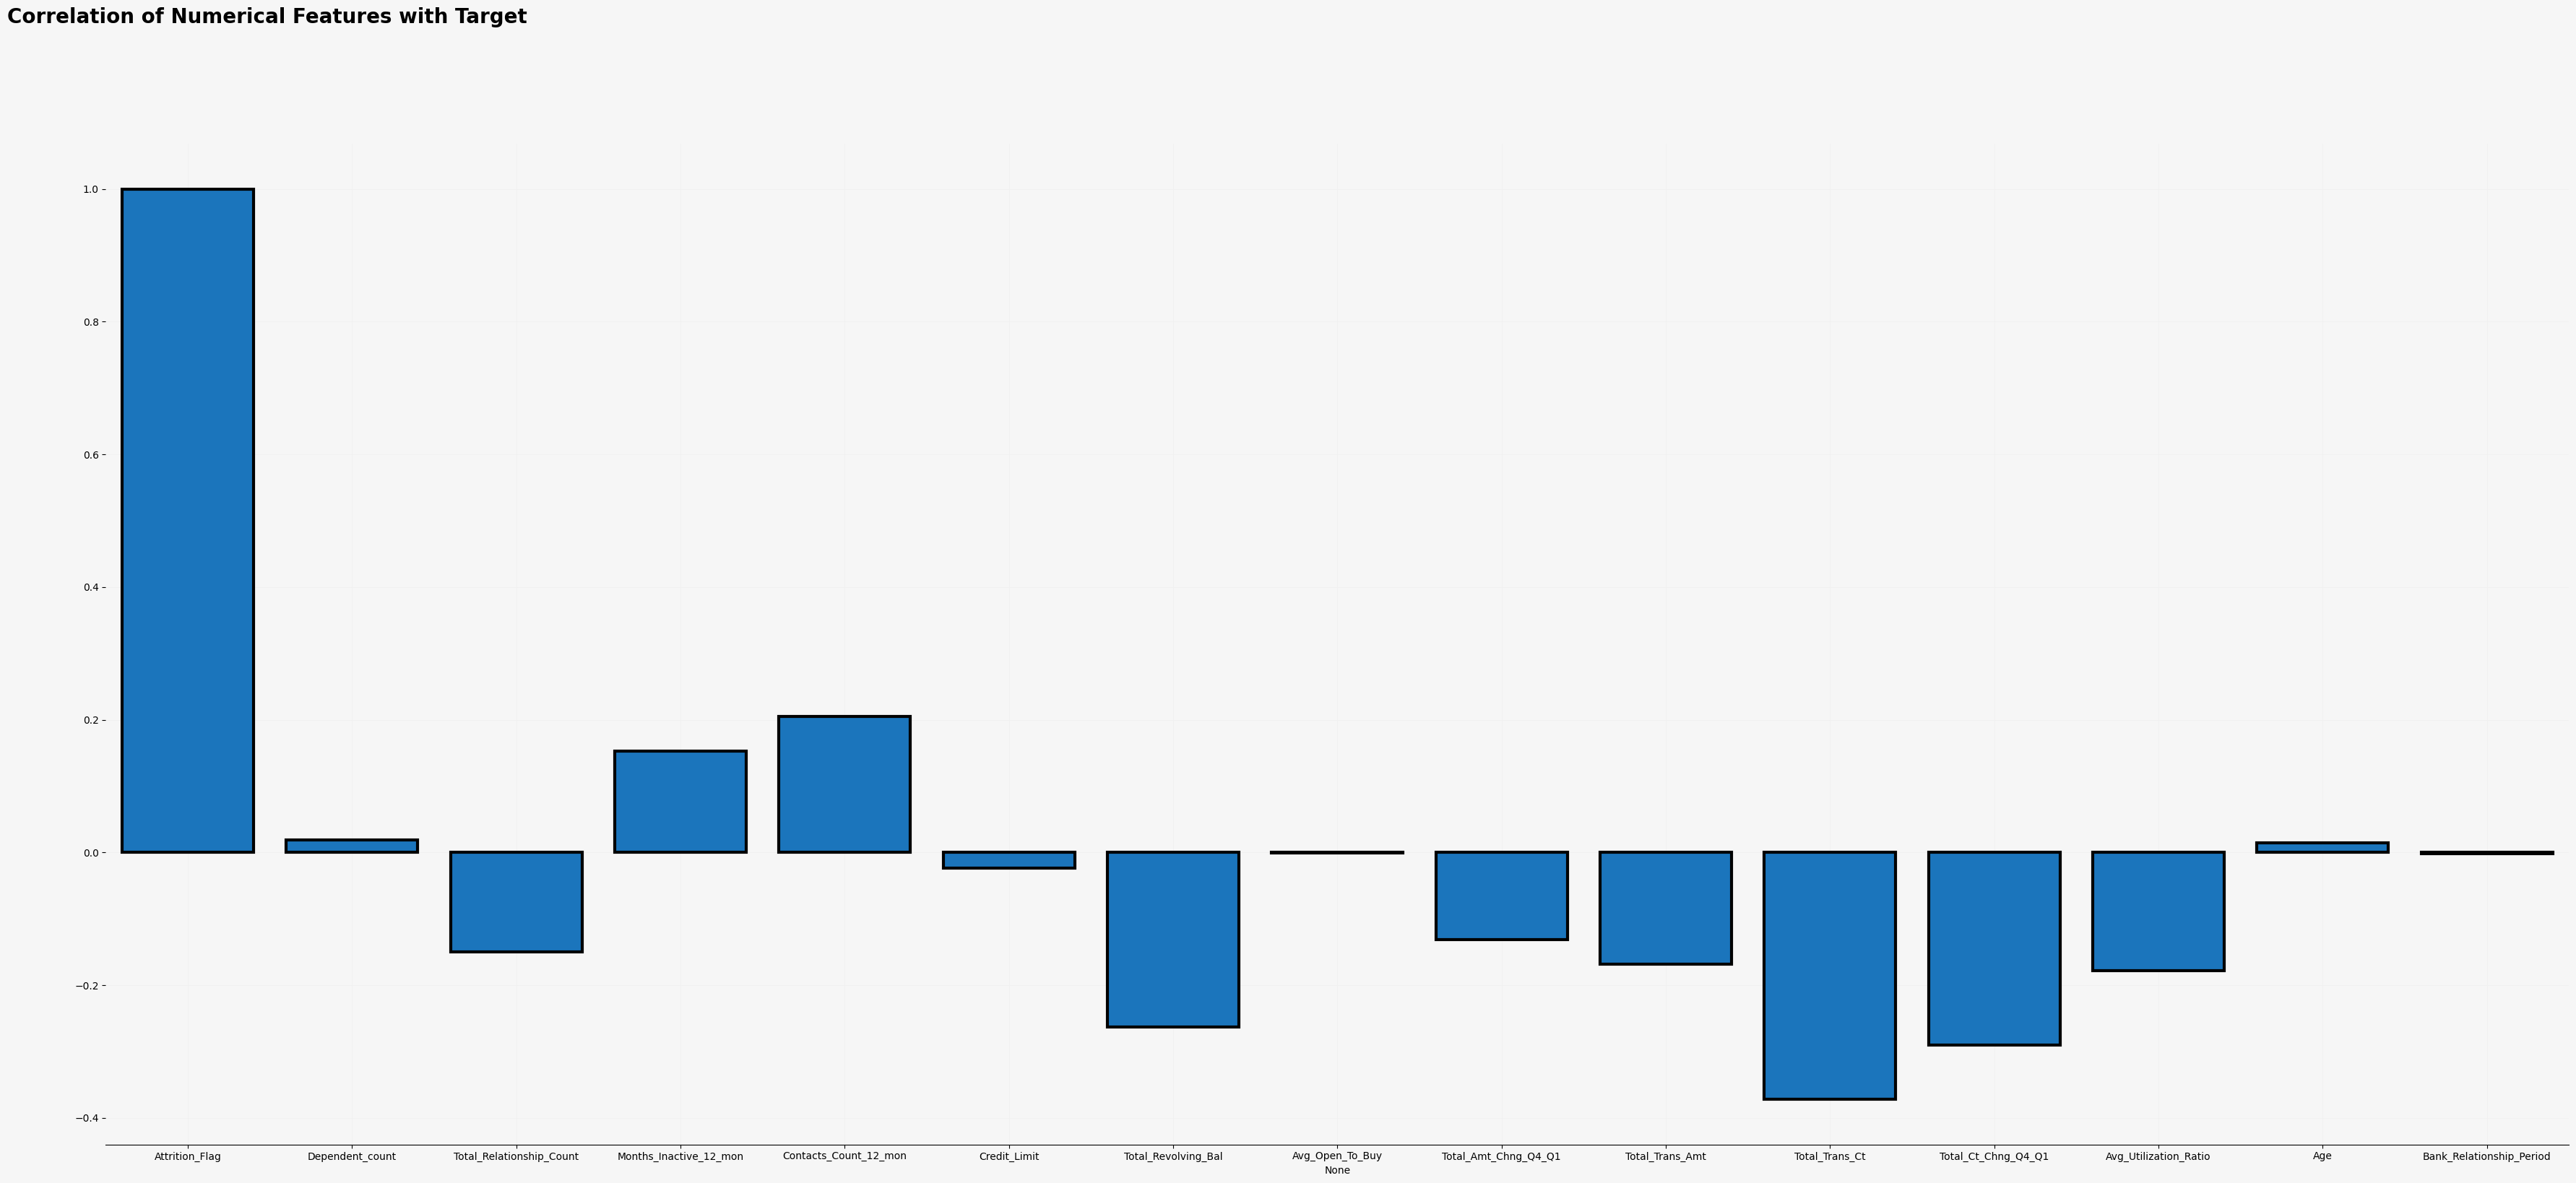

In [ ]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(numerical_df.corrwith(df['Attrition_Flag']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

**Encoding The Categorical Features**

In [ ]:
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 38)


In [ ]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Pla

In [ ]:
#Rearrangement of the columns......
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]
df.head(2)

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0                3                         5                       1   
1                5                         6                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  Age  Gender_F  Gender_M  Education_Level_College  \
0                  0.061    1     False      True                    False   
1                  0.105    2      True     False                    False   

   Education_Level_Doctorate  Education_Level_Graduate  \
0                      False                     False   
1                      False                      True   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                         True                          False   
1                        False                          False   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                       False                    False   
1                       False                    False   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                    False                    True                  False   
1                    False                   False                   True   

   Marital_Status_Unknown  Income_Category_$120K +  \
0                   False                    False   
1                   False                    False   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                        False                         True   
1                        False                        False   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                         False                           False   
1                         False                            True   

   Income_Category_Unknown  Card_Category_Blue  Card_Category_Gold  \
0                    False                True               False   
1                    False                True               False   

   Card_Category_Platinum  Card_Category_Silver  Attrition_Flag  
0                   False                 False               0  
1                   False                 False               0

**Scaling The Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [ ]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head()

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              0.6                       0.8                0.166667   
1              1.0                       1.0                0.166667   
2              0.6                       0.6                0.166667   
3              0.8                       0.4                0.666667   
4              0.6                       0.8                0.166667   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               0.500000      0.340190             0.308701         0.345116   
1               0.333333      0.206112             0.343266         0.214093   
2               0.000000      0.059850             0.000000         0.098948   
3               0.166667      0.056676             1.000000         0.022977   
4               0.000000      0.099091             0.000000         0.136557   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              0.392994         0.035273        0.248062             0.437534   
1              0.453636         0.043452        0.178295             1.000000   
2              0.763615         0.076611        0.077519             0.628164   
3              0.413600         0.036775        0.077519             0.628164   
4              0.640271         0.017025        0.139535             0.673129   

   Avg_Utilization_Ratio   Age  Gender_F  Gender_M  Education_Level_College  \
0               0.061061  0.25       0.0       1.0                      0.0   
1               0.105105  0.50       1.0       0.0                      0.0   
2               0.000000  0.50       0.0       1.0                      0.0   
3               0.760761  0.25       1.0       0.0                      0.0   
4               0.000000  0.25       0.0       1.0                      0.0   

   Education_Level_Doctorate  Education_Level_Graduate  \
0                        0.0                       0.0   
1                        0.0                       1.0   
2                        0.0                       1.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                          1.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          1.0                            0.0   
4                          0.0                            0.0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         1.0                      0.0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     1.0                    0.0   
3                      0.0                     0.0                    0.0   
4                      0.0                     1.0                    0.0   

   Marital_Status_Unknown  Income_Category_$120K +  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   
3                     1.0                      0.0   
4                     0.0                      0.0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0  

**Split The Features Into Training & Into Testing Dataset**

In [ ]:
X = scaled_features
y = df['Attrition_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

**Visualize Model Score**

In [160]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
# Import the necessary function for plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Example of how to use ConfusionMatrixDisplay:
# Assuming you have fitted a classifier 'clf' and have test data X_test, y_test
# cm = confusion_matrix(y_test, clf.predict(X_test))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot()

Standard Deviations: [0.00655545155501635, 0.006543294935273843, 0.006428208662468692, 0.005464141289796025, 0.008869206346219913]
   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.954430        0.006555  RandomForestClassifier
1              0.962895        0.006543      AdaBoostClassifier
2              0.955135        0.006428       Gradient Boosting
3              0.928047        0.005464    ExtraTreesClassifier
4              0.932844        0.008869  DecisionTreeClassifier


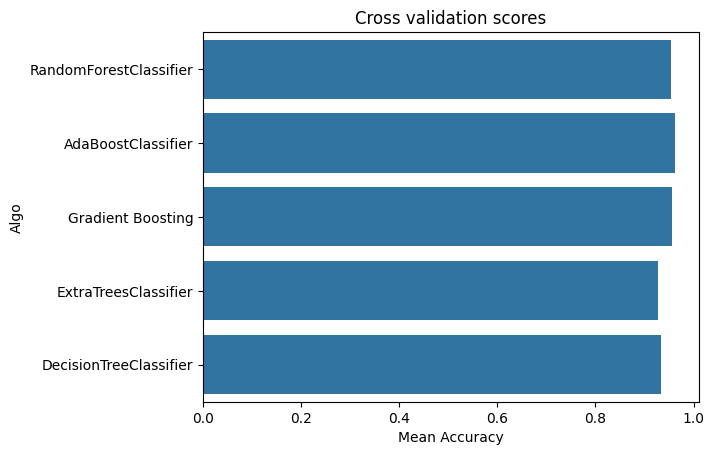

In [ ]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs:
      cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Check if standard deviations are valid
print("Standard Deviations:", cv_std)  # Check if cv_std has valid values

cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})
g = sns.barplot(x="CrossVal_Score_Means", y="Algo", data=cv_df, orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2484,   99],
       [  96,  360]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2583
           1       0.78      0.79      0.79       456

    accuracy                           0.94      3039
   macro avg       0.87      0.88      0.87      3039
weighted avg       0.94      0.94      0.94      3039



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9358341559723593


**Hyper Parameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9486673247778875


In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}
0.9445533930620821


**Checking The Best Estimators**

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}


In [ ]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit (X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3),
                                          learning_rate=1, n_estimators=120),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}
0.9445533930620821


**Train The Model With Best Hyper Parameters**

In [146]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 120)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=9,
                                                         min_samples_split=3),
                   learning_rate=1, n_estimators=120)

**Ploting The Confusion matrix**

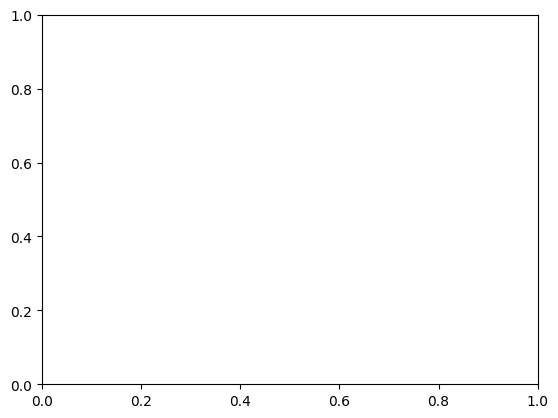

In [168]:
plot_confusion_matrix(ada, X_test, y_test, cmap=plt.cm.Blues, display_labels = ['Attritionn_0', 'Attritionn_1'])
plt.grid(False)
plt.show();

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2583
           1       0.85      0.80      0.82       456

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [130]:
print(accuracy_score(y_test, y_pred))

0.9486673247778875


**Feature Importance**

In [131]:
feature = pd.Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Amt                   0.179120
Total_Amt_Chng_Q4_Q1              0.117447
Total_Trans_Ct                    0.105888
Total_Ct_Chng_Q4_Q1               0.098714
Total_Revolving_Bal               0.070686
Credit_Limit                      0.060970
Total_Relationship_Count          0.057078
Avg_Open_To_Buy                   0.051619
Avg_Utilization_Ratio             0.033422
Contacts_Count_12_mon             0.032512
Age                               0.030604
Months_Inactive_12_mon            0.030054
Dependent_count                   0.029609
Marital_Status_Married            0.010766
Education_Level_Graduate          0.008676
Marital_Status_Single             0.007033
Education_Level_Uneducated        0.006549
Income_Category_$80K - $120K      0.006297
Education_Level_Unknown           0.006216
Education_Level_High School       0.005933
Income_Category_$60K - $80K       0.005911
Gender_M                          0.005291
Gender_F                          0.005204
Income_Cate

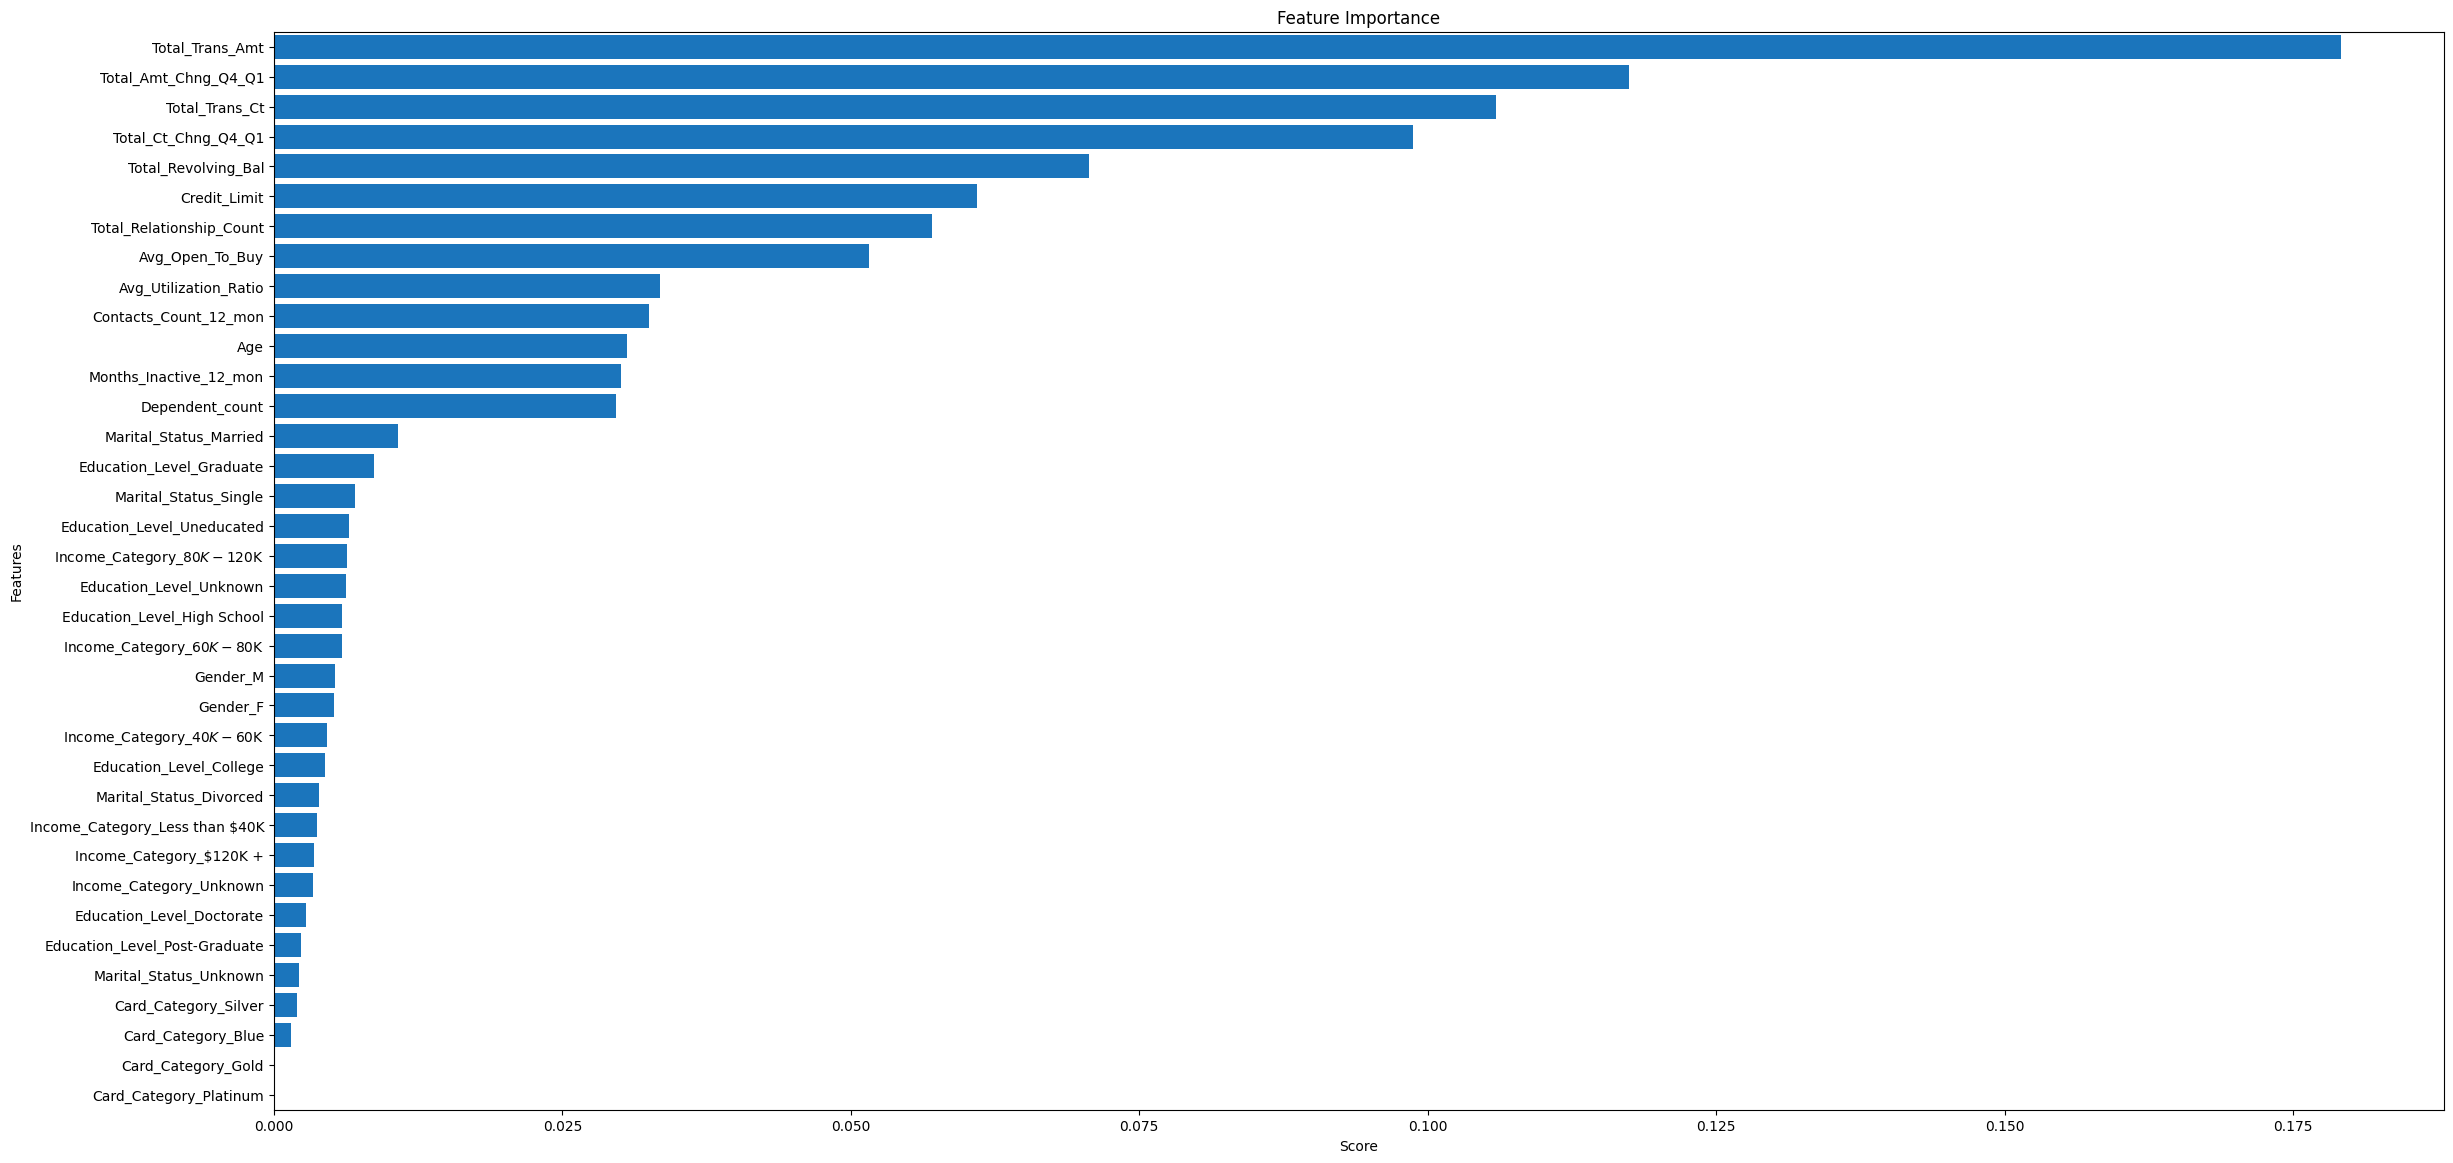

In [169]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()